## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
import tensorflow as tf
from keras.datasets import fashion_mnist


In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [84]:
x_train.shape

(60000, 28, 28)

In [85]:
x_test.shape

(10000, 28, 28)

In [86]:
# Printing the shape and data type of training, testing, and validation data
print("Training data X-- Shape :", x_train.shape,"and Data Type : ", x_train.dtype)
print("Testing data X-- Shape :", x_test.shape,"and Data Type : ", x_test.dtype)
print("Training data y-- Shape :", y_train.shape,"and Data Type : ", y_train.dtype)
print("Testing data y-- Shape :", y_test.shape,"and Data Type : ", y_test.dtype)

Training data X-- Shape : (60000, 28, 28) and Data Type :  uint8
Testing data X-- Shape : (10000, 28, 28) and Data Type :  uint8
Training data y-- Shape : (60000,) and Data Type :  uint8
Testing data y-- Shape : (10000,) and Data Type :  uint8


### Find dimensions of an image in the dataset

In [87]:
height = x_train.shape[0]
width = x_train.shape[1]
channels = x_train.shape[2]

print('Image Height       : ',height)
print('Image Width        : ',width)
print('Number of Channels : ',channels)

Image Height       :  60000
Image Width        :  28
Number of Channels :  28


In [0]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten
#from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.utils import np_utils
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline


### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
import keras


In [90]:
#Encoding the output class label (One-Hot Encoding)
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)
y_train[2]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [93]:
print('train samples X: ',x_train.shape[0],"and Data Type : ", x_train.dtype )
print('train samples y: ',y_train.shape[0],"and Data Type : ", y_train.dtype )
print('test samples X: ',x_test.shape[0], "and Data Type : ", x_test.dtype)
print('test samples y: ',y_test.shape[0], "and Data Type : ", y_test.dtype)

train samples X:  60000 and Data Type :  float32
train samples y:  60000 and Data Type :  float32
test samples X:  10000 and Data Type :  float32
test samples y:  10000 and Data Type :  float32


### Import the necessary layers from keras to build the model

In [0]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.layers.convolutional import Convolution2D,MaxPooling2D
from keras.utils import np_utils
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [0]:
TRAIN = False
BATCH_SIZE = 32
EPOCHS = 10

In [0]:
import keras
from keras.layers.convolutional import Convolution2D,MaxPooling2D

In [97]:
# Define model
    model2 = Sequential()

    # 1st Conv Layer
    model2.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model2.add(Activation('relu'))

    # 2nd Conv Layer
    model2.add(Convolution2D(32, 3, 3))
    model2.add(Activation('relu'))

    # Fully Connected Layer
    model2.add(Flatten())
    model2.add(Dense(128))
    model2.add(Activation('relu'))

    # Prediction Layer
    model2.add(Dense(10))
    model2.add(Activation('softmax'))

    # Loss and Optimizer
    model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the model2
    model2.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_test, y_test), callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 15s 251us/step - loss: 0.3755 - acc: 0.8657 - val_loss: 0.3220 - val_acc: 0.8839
Epoch 2/10
60000/60000 [==============================] - 14s 240us/step - loss: 0.2325 - acc: 0.9147 - val_loss: 0.2607 - val_acc: 0.9057
Epoch 3/10
60000/60000 [==============================] - 14s 239us/step - loss: 0.1715 - acc: 0.9363 - val_loss: 0.2452 - val_acc: 0.9164
Epoch 4/10
60000/60000 [==============================] - 14s 240us/step - loss: 0.1236 - acc: 0.9534 - val_loss: 0.2556 - val_acc: 0.9165
Epoch 5/10
60000/60000 [==============================] - 14s 239us/step - loss: 0.0852 - acc: 0.9686 - val_loss: 0.3028 - val_acc: 0.9098
Epoch 6/10
60000/60000 [==============================] - 14s 239us/step - loss: 0.0605 - acc: 0.9775 - val_loss: 0.3478 - val_acc: 0.9172
Epoch 7/10
60000/60000 [==============================] - 14s 239us/step - loss: 0.0419 - acc: 0.9846 - val_loss: 0.

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [42]:
 # Define Model
    model3 = Sequential()

    # 1st Conv Layer
    model3.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
    model3.add(Activation('relu'))

    # 2nd Conv Layer
    model3.add(Convolution2D(32, 3, 3))
    model3.add(Activation('relu'))

    # Max Pooling
    model3.add(MaxPooling2D(pool_size=(2,2)))
    
    # Dropout
    model3.add(Dropout(0.25))

    # Fully Connected Layer
    model3.add(Flatten())
    model3.add(Dense(128))
    model3.add(Activation('relu'))
    
    # More Dropout
    model3.add(Dropout(0.5))

    # Prediction Layer
    model3.add(Dense(10))
    model3.add(Activation('softmax'))

    # Loss and Optimizer
    model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Store Training Results
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=7, verbose=1, mode='auto')
    callback_list = [early_stopping]

    # Train the model
    model3.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_test, y_test), callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 191us/step - loss: 2.3016 - acc: 0.1119 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 2/10
60000/60000 [==============================] - 11s 186us/step - loss: 2.3014 - acc: 0.1124 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 3/10
60000/60000 [==============================] - 11s 186us/step - loss: 2.3014 - acc: 0.1124 - val_loss: 2.3010 - val_acc: 0.1135
Epoch 4/10
60000/60000 [==============================] - 11s 184us/step - loss: 2.3014 - acc: 0.1124 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 5/10
60000/60000 [==============================] - 11s 185us/step - loss: 2.3013 - acc: 0.1124 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 6/10
60000/60000 [==============================] - 11s 186us/step - loss: 2.3014 - acc: 0.1124 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 7/10
60000/60000 [==============================] - 11s 189us/step - loss: 2.3013 - acc: 0.1124 - val_loss: 2.

### Now, to the above model, lets add Data Augmentation 

In [98]:
model3.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_13 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_14 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4608)             

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

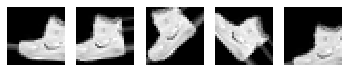

In [100]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [101]:
model3.fit_generator(datagen.flow(x_train, y_train,batch_size=32),
                    samples_per_epoch=x_train.shape[0],
                    nb_epoch=10,
                    validation_data=(x_test, y_test), callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=1875, epochs=10)`
  after removing the cwd from sys.path.


Epoch 1/10
1875/1875 [==============================] - 23s 12ms/step - loss: 1.2638 - acc: 0.5318 - val_loss: 0.7755 - val_acc: 0.7030
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.9862 - acc: 0.6330 - val_loss: 0.6677 - val_acc: 0.7446
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.8974 - acc: 0.6647 - val_loss: 0.6496 - val_acc: 0.7520
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.8430 - acc: 0.6868 - val_loss: 0.5992 - val_acc: 0.7733
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.8125 - acc: 0.6935 - val_loss: 0.5736 - val_acc: 0.7720
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.7850 - acc: 0.7057 - val_loss: 0.5638 - val_acc: 0.7755
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.7619 - acc: 0.7148 - val_loss: 0.5526 - val_acc: 0.7878
Epoch 8/10
1875/1875 [==========================

###  Report the final train and validation accuracy

In [102]:
#Testing the model on test set
score = model3.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 58us/step
Test loss: 0.5401199501991272
Test accuracy: 0.7914


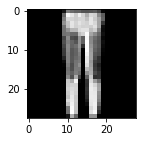

1


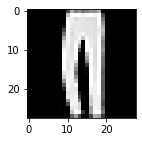

1


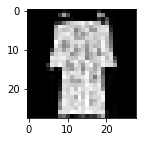

3


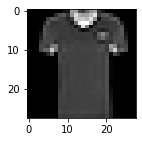

0


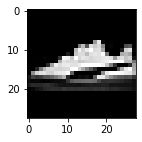

7


In [105]:
import numpy as np

plt.figure(figsize=(2,2))
plt.imshow(x_test[3].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model3.predict(x_test[3].reshape(1,28,28,1))))


plt.figure(figsize=(2,2))
plt.imshow(x_test[2].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model3.predict(x_test[2].reshape(1,28,28,1))))


plt.figure(figsize=(2,2))
plt.imshow(x_test[33].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model3.predict(x_test[33].reshape(1,28,28,1))))


plt.figure(figsize=(2,2))
plt.imshow(x_test[59].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model3.predict(x_test[59].reshape(1,28,28,1))))


plt.figure(figsize=(2,2))
plt.imshow(x_test[36].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model3.predict(x_test[36].reshape(1,28,28,1))))

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from keras.datasets import cifar10

### **Load CIFAR10 dataset**

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [116]:
print('train samples X: ',x_train.shape[0],"and Data Type : ", x_train.dtype )
print('train samples y: ',y_train.shape[0],"and Data Type : ", y_train.dtype )
print('test samples X: ',x_test.shape[0], "and Data Type : ", x_test.dtype)
print('test samples y: ',y_test.shape[0], "and Data Type : ", y_test.dtype)

train samples X:  50000 and Data Type :  uint8
train samples y:  50000 and Data Type :  uint8
test samples X:  10000 and Data Type :  uint8
test samples y:  10000 and Data Type :  int64


### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

### **Prepare/fit the generator.**

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

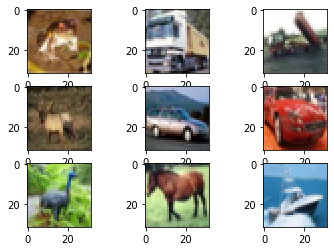

In [121]:
# Plot ad hoc CIFAR10 instances
from keras.datasets import cifar10
from matplotlib import pyplot
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# create a grid of 3x3 images
for i in range(0, 9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(X_train[i])
# show the plot
pyplot.show()

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [0]:
datagen2 = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

In [0]:
datagen2.fit(x_train)

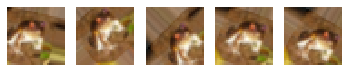

In [127]:
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()